# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

571

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Openweather api url.
url = "http://api.openweathermap.org/data/2.5/weather?"

# request the results in fahrenheit 
units = "imperial"

# Initialize the counters
records = 0
sets = 1

# Initialize empty list
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
maxtemp_list = []
windspeed_list = []

# Perform a weather check on each city using a series of successive API calls
for city in cities:
    # Build query URL
    query_url = f"{url}appid={api_key}&q={city}&units={units}"

    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if weather_json["cod"] == 200:
        
        records = records + 1
        if (records % 50 == 0):
            # Reset records. Increment sets
            records = 0
            sets = sets + 1
            
        print(f"Processing Record {records} of Set {sets} | {city}")
    
        # Collect the data from JASON response and store it in to the list
        city_list.append(city)
        cloudiness_list.append(weather_json["clouds"]["all"])
        country_list.append(weather_json["sys"]["country"])
        date_list.append(weather_json["dt"])
        humidity_list.append(weather_json["main"]["humidity"])
        lat_list.append(weather_json["coord"]["lat"])
        lng_list.append(weather_json["coord"]["lon"])
        maxtemp_list.append(weather_json["main"]["temp_max"])
        windspeed_list.append(weather_json["wind"]["speed"])
        
    else:
        print(f"City not found. Skipping...")

        
# API returns datetime in unix.
# Convert unix datetime format in to "mon/day/2-digit-year" format
result = time.gmtime(date_list[0])
month = result.tm_mon
day = result.tm_mday

# From a 4 digit year, read last 2 digit
four_digit_year = str(result.tm_year)
two_digit_year = four_digit_year[2:4]

# usse this format i.e. "(month/day/year)" for the graphs title
date_print = f"({month}/{day}/{two_digit_year})"

Processing Record 1 of Set 1 | southwick
Processing Record 2 of Set 1 | eyl
Processing Record 3 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 1 | zhigansk
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | edson
Processing Record 7 of Set 1 | paamiut
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | mpraeso
Processing Record 11 of Set 1 | santa catarina
Processing Record 12 of Set 1 | ambatondrazaka
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | coihaique
Processing Record 19 of Set 1 | kahului
Processing Record 20 of Set 1 | sabzevar
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | wanning
Processing Record 23 of Set 1 | barrow
Processing Record 24 of Set 1 | jamestown

Processing Record 39 of Set 4 | hinton
Processing Record 40 of Set 4 | yabrud
Processing Record 41 of Set 4 | san andres
Processing Record 42 of Set 4 | roald
Processing Record 43 of Set 4 | nabire
Processing Record 44 of Set 4 | santa marta
Processing Record 45 of Set 4 | sobolevo
Processing Record 46 of Set 4 | san rafael
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | arraial do cabo
Processing Record 49 of Set 4 | oakdale
Processing Record 0 of Set 5 | jonesboro
Processing Record 1 of Set 5 | mantua
Processing Record 2 of Set 5 | port hardy
Processing Record 3 of Set 5 | vao
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | lac du bonnet
Processing Record 6 of Set 5 | slonim
Processing Record 7 of Set 5 | tuatapere
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | carnarvon
Processing Record 10 of Set 5 | eirunepe
Processing Record 11 of Set 5 | poopo
Processing Record 12 of Set 5 | yulara
Processing Record 13 of Set 

Processing Record 27 of Set 8 | arlit
Processing Record 28 of Set 8 | fukue
Processing Record 29 of Set 8 | mbandaka
Processing Record 30 of Set 8 | neiafu
Processing Record 31 of Set 8 | butembo
Processing Record 32 of Set 8 | rawson
Processing Record 33 of Set 8 | orlik
Processing Record 34 of Set 8 | guntakal
City not found. Skipping...
Processing Record 35 of Set 8 | gat
Processing Record 36 of Set 8 | humaita
Processing Record 37 of Set 8 | ankazoabo
Processing Record 38 of Set 8 | meulaboh
City not found. Skipping...
Processing Record 39 of Set 8 | dawson creek
City not found. Skipping...
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | yenagoa
Processing Record 42 of Set 8 | naron
Processing Record 43 of Set 8 | luderitz
Processing Record 44 of Set 8 | sistranda
City not found. Skipping...
Processing Record 45 of Set 8 | elko
Processing Record 46 of Set 8 | ketchikan
Processing Record 47 of Set 8 | yima
Processing Record 48 of Set 8 | ruidoso
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe from raw data
cityweather_df = pd.DataFrame({"City": city_list, 
                    "Cloudiness": cloudiness_list,
                    "Country": country_list,
                    "Date": date_list,
                    "Humidity": humidity_list,
                    "Lat": lat_list,
                    "Lng": lng_list,
                    "Max Temp": maxtemp_list,
                    "Wind Speed": windspeed_list
                   })


# Write to the file
cityweather_df.to_csv(output_data_file, index = None, header=True)

# Display the dataframe count of all the columns
cityweather_df.count()

City          516
Cloudiness    516
Country       516
Date          516
Humidity      516
Lat           516
Lng           516
Max Temp      516
Wind Speed    516
dtype: int64

In [5]:
# Display the dataframe
cityweather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,southwick,20,GB,1554073951,87,50.83,-0.24,44.01,9.17
1,eyl,92,SO,1554073983,100,7.98,49.82,77.93,6.64
2,petropavlovsk-kamchatskiy,20,RU,1554071400,68,53.05,158.65,26.60,3.06
3,zhigansk,48,RU,1554073984,85,66.77,123.37,20.69,7.20
4,norman wells,90,CA,1554072540,93,65.28,-126.83,35.60,14.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

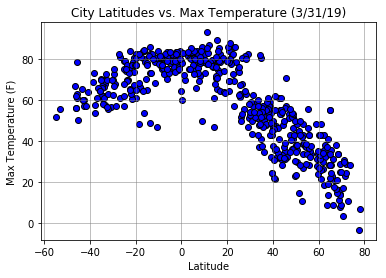

In [6]:
latitude = list(cityweather_df["Lat"])
max_temp = list(cityweather_df["Max Temp"])

# Use matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, max_temp, marker="o", facecolors="blue", linewidth=1, edgecolors="black")

# Create a title, x label, and y label for our chart
title = f"City Latitudes vs. Max Temperature {date_print}"
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Create Grids
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save an image of the chart and print to screen
# Save the Figure
plt.savefig("city-latitude_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot



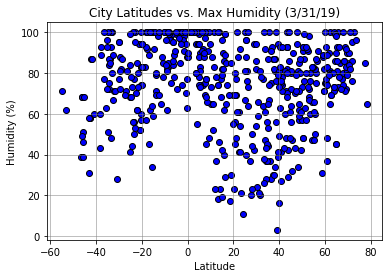

In [7]:
latitude = list(cityweather_df["Lat"])
max_temp = list(cityweather_df["Humidity"])

# Use matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, max_temp, marker="o", facecolors="blue", linewidth=1, edgecolors="black")

# Create a title, x label, and y label for our chart
title = f"City Latitudes vs. Max Humidity {date_print}"
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Create Grids
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save an image of the chart and print to screen
# Save the Figure
plt.savefig("city-latitude_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

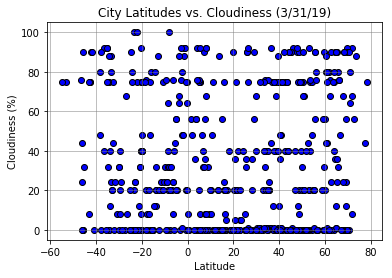

In [8]:
latitude = list(cityweather_df["Lat"])
max_temp = list(cityweather_df["Cloudiness"])

# Use matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, max_temp, marker="o", facecolors="blue", linewidth=1, edgecolors="black")

# Create a title, x label, and y label for our chart
title = f"City Latitudes vs. Cloudiness {date_print}"
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Create Grids
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save an image of the chart and print to screen
# Save the Figure
plt.savefig("city-latitude_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

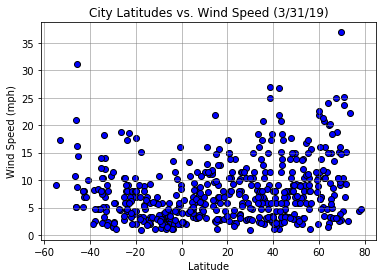

In [9]:
latitude = list(cityweather_df["Lat"])
max_temp = list(cityweather_df["Wind Speed"])

# Use matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, max_temp, marker="o", facecolors="blue", linewidth=1, edgecolors="black")

# Create a title, x label, and y label for our chart
title = f"City Latitudes vs. Wind Speed {date_print}"
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Create Grids
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save an image of the chart and print to screen
# Save the Figure
plt.savefig("city-latitude_vs_windspeed.png")
plt.show()